In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
plt.rcParams['figure.dpi'] = 90

In [25]:
df = pd.read_csv('original_dataset.csv', sep = ';')

### Introduction of roll, pitch and module parameters for each accelerometer

In [26]:
df['roll1'] = pd.Series(180/np.pi*(np.arctan2(df['y1'], df['z1'])))
df['pitch1'] = pd.Series(180/np.pi*(np.arctan2(-df['x1'], np.sqrt(np.power(df['y1'], 2) + np.power(df['z1'], 2)))))
df['accel1'] = pd.Series(np.sqrt(np.power(df['x1'], 2) + np.power(df['y1'], 2) + np.power(df['z1'], 2)))

df['roll2'] = pd.Series(180/np.pi*(np.arctan2(df['y2'], df['z2'])))
df['pitch2'] = pd.Series(180/np.pi*(np.arctan2(-df['x2'], np.sqrt(np.power(df['y2'], 2) + np.power(df['z2'], 2)))))
df['accel2'] = pd.Series(np.sqrt(np.power(df['x2'], 2) + np.power(df['y2'], 2) + np.power(df['z2'], 2)))

df['roll3'] = pd.Series(180/np.pi*(np.arctan2(df['y3'], df['z3'])))
df['pitch3'] = pd.Series(180/np.pi*(np.arctan2(-df['x3'], np.sqrt(np.power(df['y3'], 2) + np.power(df['z3'], 2)))))
df['accel3'] = pd.Series(np.sqrt(np.power(df['x3'], 2) + np.power(df['y3'], 2) + np.power(df['z3'], 2)))

df['roll4'] = pd.Series(180/np.pi*(np.arctan2(df['y4'], df['z4'])))
df['pitch4'] = pd.Series(180/np.pi*(np.arctan2(-df['x4'], np.sqrt(np.power(df['y4'], 2) + np.power(df['z4'], 2)))))
df['accel4'] = pd.Series(np.sqrt(np.power(df['x4'], 2) + np.power(df['y4'], 2) + np.power(df['z4'], 2)))

df.head(1)

,user,gender,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,...,accel1,roll2,pitch2,accel2,roll3,pitch3,accel3,roll4,pitch4,accel4
0,debora,Woman,46,"1,62",75,"28,6",-3,92,-63,-23,...,111.543713,136.548158,41.308515,34.842503,131.496468,-2.062298,138.942434,-144.981829,39.884957,233.918789


#### Remove of x, y, z parameters for each accelerometer

In [29]:
df = df.drop(labels = ['x1', 'y1', 'z1'], axis = 1)
df = df.drop(labels = ['x2', 'y2', 'z2'], axis = 1)
df = df.drop(labels = ['x3', 'y3', 'z3'], axis = 1)
df = df.drop(labels = ['x4', 'y4', 'z4'], axis = 1)

df.head(1)

,user,gender,age,how_tall_in_meters,weight,body_mass_index,class,roll1,pitch1,module1,roll2,pitch2,module2,roll3,pitch3,module3,roll4,pitch4,module4
0,debora,Woman,46,"1,62",75,"28,6",sitting,124.402665,1.541172,111.543713,136.548158,41.308515,34.842503,131.496468,-2.062298,138.942434,-144.981829,39.884957,233.918789


### Given 8 row calculate mean and std for the roll, pitch and module parameters

In [27]:
def make_mean_variance(dataframe):
    new_row = {}

    for field in ['user', 'gender', 'age', 'how_tall_in_meters', 'weight', 'body_mass_index', 'class']:
        new_row[field] = dataframe[field].iloc[0]
    
    for field in ['roll1', 'pitch1', 'roll2', 'pitch2', 'roll3', 'pitch3','roll4', 'pitch4']:
        new_row[str(f'{field}_var')] = dataframe[field].var()
    #for field in ['accel1', 'accel2', 'accel3', 'accel4']:
    #    new_row[str(f'{field}_mean')] = dataframe[field].mean()
        
    for i in range (1, 5):
        x_list = dataframe[f'x{i}']
        y_list = dataframe[f'y{i}']
        z_list = dataframe[f'z{i}']
        x = x_list.sum()
        y = y_list.sum()
        z = z_list.sum()

        new_row[str(f'accel{i}_module')] = np.sqrt(np.power(x, 2) + np.power(y, 2) + np.power(z, 2))/x_list.shape[0]
    
    return new_row

In [28]:
sittingdown = df.loc[df['class'] == 'sittingdown']
sittingdown_user = df.loc[df['user'] == 'jose_carlos']
n_instance = sittingdown_user.shape[0]
avg_df = pd.DataFrame()

for i in range(int(np.ceil(n_instance/7))):
    avg_df = avg_df.append(make_mean_variance(sittingdown_user[i*7:min((i+1)*7+1, n_instance)]), ignore_index=True)
    
avg_df.head(1)

,accel1_module,accel2_module,accel3_module,accel4_module,age,body_mass_index,class,gender,how_tall_in_meters,pitch1_var,pitch2_var,pitch3_var,pitch4_var,roll1_var,roll2_var,roll3_var,roll4_var,user,weight
0,161.185985,26.849115,87.396188,289.719962,75.0,"24,0",sitting,Man,"1,67",0.720065,3.128546,0.052769,0.023574,0.276897,0.759015,27669.917698,0.062205,jose_carlos,67.0


### Mean and std on 8 subsequent rows on roll, pitch e module parameters of every accelerometer. Dataframe has been splitted by class and by user

In [29]:
avg_df = pd.DataFrame()

for classe in df['class'].unique():
    class_df = df.loc[df['class'] == classe]
    
    for user in df['user'].unique():
        class_user_df = class_df.loc[class_df['user'] == user]
        n_instance = class_user_df.shape[0]
        
        for i in range(int(np.ceil(n_instance/7))):
            avg_df = avg_df.append(make_mean_variance(class_user_df[i*7:min((i+1)*7+1, n_instance)]), ignore_index=True)

avg_df.head()

,accel1_module,accel2_module,accel3_module,accel4_module,age,body_mass_index,class,gender,how_tall_in_meters,pitch1_var,pitch2_var,pitch3_var,pitch4_var,roll1_var,roll2_var,roll3_var,roll4_var,user,weight
0,113.982044,29.443006,137.710577,232.960733,46.0,"28,6",sitting,Woman,"1,62",0.438002,45.457256,7.036388,0.221751,1.533825,30.969607,0.139855,0.153628,debora,75.0
1,114.797920,28.398393,137.909730,232.614790,46.0,"28,6",sitting,Woman,"1,62",0.419693,7.649636,0.041222,0.122911,0.566651,21.397079,0.141829,0.056268,debora,75.0
2,114.892001,28.135276,137.932841,231.920043,46.0,"28,6",sitting,Woman,"1,62",0.243040,9.296968,0.072135,0.178729,0.395055,27.383679,0.059445,0.206171,debora,75.0
3,115.612094,28.280680,138.280399,234.328062,46.0,"28,6",sitting,Woman,"1,62",1.548990,26.360763,0.065346,7.404754,0.496678,34.840695,0.153512,2.922507,debora,75.0
4,118.338101,28.052128,137.944565,254.748221,46.0,"28,6",sitting,Woman,"1,62",0.788506,8.938048,0.096916,2.268310,0.570225,13.505881,0.244922,1.251896,debora,75.0


### Discretization 

In [30]:
n_bins = 12

for acceleration in ['accel1_module', 'accel2_module', 'accel3_module', 'accel4_module']:
    avg_df[f'{acceleration}_disc'] = pd.Series(pd.cut(avg_df[acceleration], n_bins, \
                                              labels=list(range(n_bins))))

avg_df.head(1)

,accel1_module,accel2_module,accel3_module,accel4_module,age,body_mass_index,class,gender,how_tall_in_meters,pitch1_var,...,roll1_var,roll2_var,roll3_var,roll4_var,user,weight,accel1_module_disc,accel2_module_disc,accel3_module_disc,accel4_module_disc
0,113.982044,29.443006,137.710577,232.960733,46.0,"28,6",sitting,Woman,"1,62",0.438002,...,1.533825,30.969607,0.139855,0.153628,debora,75.0,1,0,0,1


### Mean and std of acceleration_module

In [31]:
avg_df['accel_mean'] = (avg_df['accel1_module'] + avg_df['accel2_module'] + \
                        avg_df['accel3_module'] + avg_df['accel4_module']) /4

accel_std = [np.std([avg_df['accel1_module'].iloc[i], avg_df['accel2_module'].iloc[i], \
                        avg_df['accel3_module'].iloc[i], avg_df['accel4_module'].iloc[i]]) for i in range(avg_df.shape[0])]
avg_df['accel_std'] = pd.Series(accel_std)
    
avg_df.head(1)

,accel1_module,accel2_module,accel3_module,accel4_module,age,body_mass_index,class,gender,how_tall_in_meters,pitch1_var,...,roll3_var,roll4_var,user,weight,accel1_module_disc,accel2_module_disc,accel3_module_disc,accel4_module_disc,accel_mean,accel_std
0,113.982044,29.443006,137.710577,232.960733,46.0,"28,6",sitting,Woman,"1,62",0.438002,...,0.139855,0.153628,debora,75.0,1,0,0,1,128.52409,72.491269


#### Write the new dataframe on file

In [32]:
avg_df.to_csv('measure_dataset.csv', sep = ';', index=False)

#### Read modify dataset

In [33]:
avg_df = pd.read_csv('measure_dataset.csv', sep = ';')

### Counting and plot of distribution value of accel1, accel2, accel3 and accel4

In [185]:
from collections import Counter

n_bins = 15

print(f'Generale (elementi {avg_df.shape[0]})')
for key, value in Counter(pd.cut(avg_df['accel1'], n_bins, labels=list(range(n_bins)))).most_common():
    print(key, value)


#for interval in avg_df['discrete_interval'].unique():
#    print(f'\ninterval {interval}')
#    print(avg_df.loc[avg_df['discrete_interval'] == interval]['class'].value_counts())


Generale (elementi 23668)
2 8739
3 7898
1 3987
0 1987
4 1029
5 14
13 7
12 2
9 1
10 1
14 1
8 1
6 1


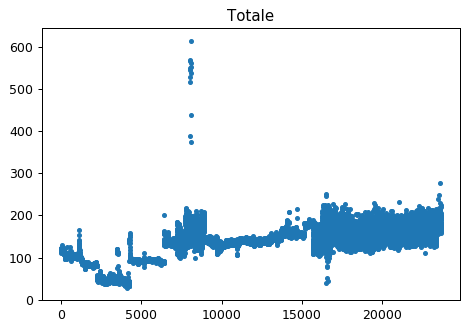

"\nfor classe in avg_df['class'].unique():\n    class_df = avg_df.loc[avg_df['class'] == classe]\n    module1 = class_df['accel1']\n    plt.plot(list(range(len(module1))), module1, linestyle = ' ', marker = '.')\n    plt.title(classe)\n    plt.show()\n"

In [186]:
plt.plot(list(range(len(avg_df))), avg_df['accel1'], linestyle = ' ', marker = '.')
plt.title('Totale')
plt.show()

'''
for classe in avg_df['class'].unique():
    class_df = avg_df.loc[avg_df['class'] == classe]
    module1 = class_df['accel1']
    plt.plot(list(range(len(module1))), module1, linestyle = ' ', marker = '.')
    plt.title(classe)
    plt.show()
'''

In [215]:
print(f"generale: {avg_df['accel1'].mean()}")
for classe in avg_df['class'].unique():
    class_df = avg_df.loc[avg_df['class'] == classe]
    print(f"\nclasse {classe}: {class_df['accel1'].mean()}")
    
    for user in avg_df['user'].unique():
        class_user_df = class_df.loc[class_df['user'] == user]
        print(f"utente {user}: {class_user_df['accel1'].mean()}")

generale: 131.57192152485703

classe sitting: 86.25177269084847
utente debora: 96.22567953304662
utente katia: 47.77669054206964
utente wallace: 93.00415456718092
utente jose_carlos: 137.13335544293201

classe sittingdown: 156.16614715190957
utente debora: 133.79742034273644
utente katia: 172.26467004053765
utente wallace: 154.6935025151664
utente jose_carlos: 181.6956010552999

classe standing: 145.9206733303471
utente debora: 134.86471336657618
utente katia: 139.77535652256452
utente wallace: 154.76370597698173
utente jose_carlos: 179.36438895715187

classe standingup: 153.0317737647981
utente debora: 137.63160874947843
utente katia: 158.98013853629743
utente wallace: 159.57604207776404
utente jose_carlos: 167.03958344897296

classe walking: 155.93704679231536
utente debora: 145.17716668910018
utente katia: 157.02862356455745
utente wallace: 161.70320785475715
utente jose_carlos: 179.2728132931691


### Compare 'accel_mean' and 'accel_module'

In [21]:
compare = {}
for accel in ['accel1', 'accel2', 'accel3', 'accel4']:
    mean = avg_df[f'{accel}_mean']
    module = avg_df[f'{accel}_module']

    compare[accel] = pd.Series(mean-module).sort_values(ascending = False)

### Distribution of classes by user

In [306]:
n_instance = df.loc[df['class'] == 'sitting'].shape[0]
df.loc[df['class'] == 'sitting']['user'].value_counts()/n_instance*100

debora         30.840789
wallace        29.612293
katia          28.204065
jose_carlos    11.342853
Name: user, dtype: float64

In [74]:
n_instance = df.loc[df['class'] == 'standing'].shape[0]
df.loc[df['class'] == 'standing']['user'].value_counts()/n_instance*100

debora         31.538949
wallace        30.540426
katia          30.048554
jose_carlos     7.872071
Name: user, dtype: float64

In [34]:
n_instance = df.loc[df['class'] == 'walking'].shape[0]
df.loc[df['class'] == 'walking']['user'].value_counts()/n_instance*100

wallace        32.350772
debora         31.394330
katia          31.242222
jose_carlos     5.012676
Name: user, dtype: float64

In [32]:
n_instance = df.loc[df['class'] == 'standingup'].shape[0]
df.loc[df['class'] == 'standingup']['user'].value_counts()/n_instance*100

wallace        33.145389
debora         31.035038
katia          29.883206
jose_carlos     5.936367
Name: user, dtype: float64

In [30]:
n_instance = df.loc[df['class'] == 'sittingdown'].shape[0]
df.loc[df['class'] == 'sittingdown']['user'].value_counts()/n_instance*100

katia          33.964657
debora         29.990699
wallace        29.474930
jose_carlos     6.569713
Name: user, dtype: float64

### Some plot

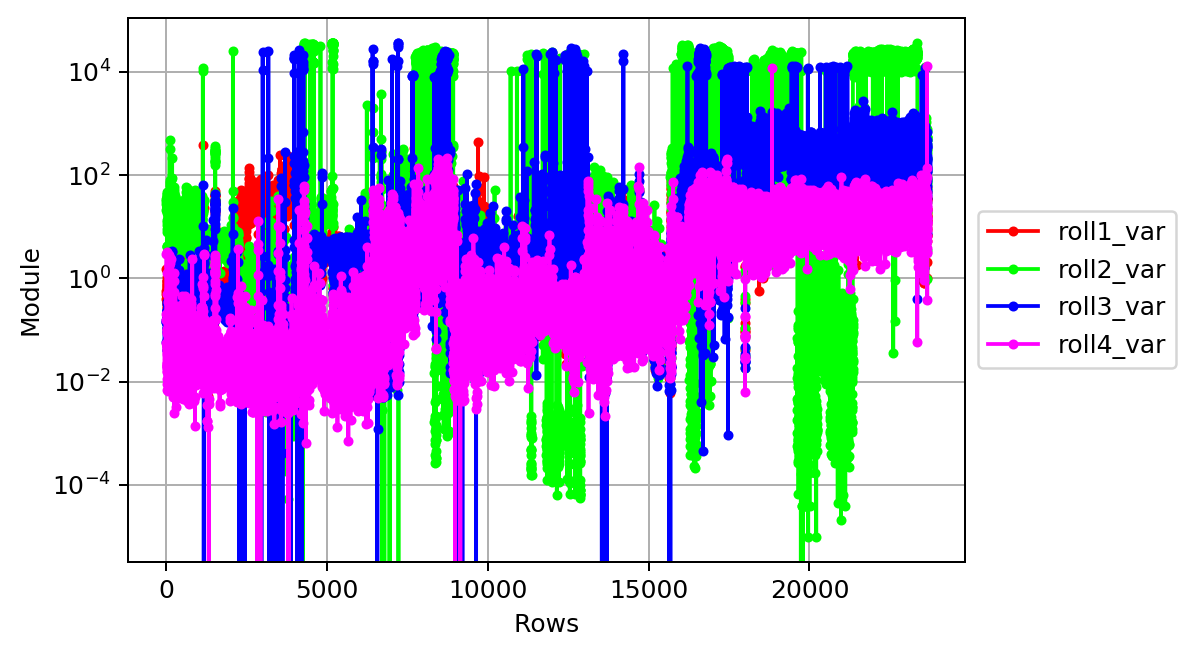

In [217]:
fields = ['roll1_var', 'roll2_var', 'roll3_var', 'roll4_var']
colors = ['#ff0000', '#00ff00', '#0000ff', '#ff00ff']
legend = []
labels = []

for k, field in enumerate(fields):
    legend.append(plt.plot(list(range(avg_df.shape[0])), list(avg_df[field]), \
                           linestyle = '-', marker = '.', color = colors[k])[0])
    labels.append(field)
 
    
plt.grid(True)
plt.yscale("log")
plt.legend(legend, labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Module")
plt.xlabel("Rows")
plt.show()